# CSV파일을 Load해서 분석해 보고 싶다. 
* Target이 String형태임에 주의
* 1차 인코딩 : String → Num
* 2차 인코딩(One Hot Encoding) : Num  → array  
  - ex) 2 → [0,0,1] , 1 → [0,1,0]

## Hyper Parameter 설정


In [ ]:
batch_size = 10
num_classes = 3
epochs = 200

## 라이브러리 및 함수 선언

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
def hist_view(hist):
  print('## training loss and acc ##')
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='center')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='center right')

  plt.show()

## 직접 데이터 로딩
라이브러리에서 제공하는 데이터가 아닌 자신이 갖고 있는 CSV 파일을 가져옵니다.

In [ ]:
# 기존 코드
# from sklearn import datasets
# iris = datasets.load_iris()
# x=iris.data

# 데이터 다운로드와 로딩
import pandas as pd
![ ! -f  iris0.csv ]&&wget http://j.finfra.com/_file/iris0.csv
iris=pd.read_csv("iris0.csv")



--2022-01-04 03:12:29--  http://j.finfra.com/_file/iris0.csv
Resolving j.finfra.com (j.finfra.com)... 211.252.85.187
Connecting to j.finfra.com (j.finfra.com)|211.252.85.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3730 (3.6K) [text/csv]
Saving to: ‘iris0.csv’

iris0.csv           100%[===================>]   3.64K  --.-KB/s    in 0s      

2022-01-04 03:12:30 (458 MB/s) - ‘iris0.csv’ saved [3730/3730]



참고사항.
- wget을 활용하는 것이 아닌 좌측 파일 탐색기에 드래그를 통해 파일을 올려서 로드를 할 수도 있습니다.

## 컬럼 추출
데이터 셋과 결과값을 분리해줍니다.

In [ ]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


위의 결과를 보면 0 , 1 , 2 , 3 이 데이터 셋이고, 4 가 결과인 것을 알 수 있습니다.<BR>
이것에 맞춰 X 와 Y 를 분리해 줍니다.

In [ ]:
x=iris.iloc[:,0:4].values
y_text=iris.iloc[:,4:5]


## 1차 인코딩
가져온 Y 데이터의 값은 문자열 형태인데 이것을 1차로 0, 1, 2 의 숫자로 인코딩해 줍니다.

In [ ]:
sets=y_text.drop_duplicates()["Species"].tolist()
encoder={k:v for v,k in enumerate(sets)}
y_num=[ encoder[i] for i in y_text["Species"].tolist() ]



## One-hot Encoding
조금 더 높은 확률로 결과물이 나올 수 있도록 One-hot Encoding 을 해줍니다.

In [ ]:
# One-hot Encoding
# iris.target → y
y= keras.utils.to_categorical(y_num, num_classes)


One-hot Encoding 의 결과는 다음과 같습니다.<BR>
0 = [1, 0, 0], 1 = [0, 1, 0], 2 = [0, 0, 1]

In [ ]:
y[0]

array([1., 0., 0.], dtype=float32)

## 훈련 데이터와 평가 데이터 분리

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((105, 4), (45, 4), (105, 3), (45, 3))

## 모델 만들기

In [ ]:
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(4,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


## Hyper Parameter를 적용해서 훈련

In [ ]:
# batch_size,epochs
score=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))



## 결과 확인

## training loss and acc ##


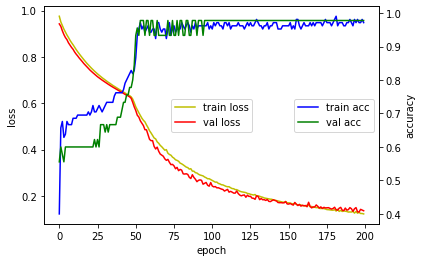

Test loss: 0.1361912488937378
Test accuracy: 0.9777777791023254


In [ ]:
hist_view(hist)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
decoder = {k:v for k,v in enumerate( sets )}
decoder

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [ ]:
r=np.argmax(model.predict(x_test[:10,:]), axis=-1)
[decoder[i] for i in r]

['virginica',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor']

# 활성함수(Activation함수)를 수정하고 싶다.